In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import geopandas as gpd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%pwd

'/home/cseadmin/data/cys/TrafficFlowModel/data_process'

In [7]:
# sz=ox.graph_from_place("shenzhen, china", which_result=2)
# ox.save_graphml(sz, "../data/sz_osm.graphml")

In [16]:
# sz_graph=ox.load_graphml("../data/sz_osm.graphml")
sz_graph=nx.read_gpickle("../data/sz_graph.pkl")

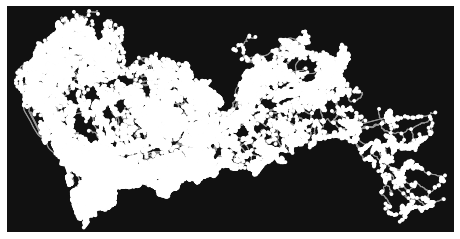

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [10]:
ox.plot_graph(sz_graph)

In [11]:
ox.basic_stats(sz_graph)

{'n': 67305,
 'm': 160062,
 'k_avg': 4.756318252730109,
 'edge_length_total': 22686150.532000806,
 'edge_length_avg': 141.73351908635908,
 'streets_per_node_avg': 2.971592006537404,
 'streets_per_node_counts': {0: 0,
  1: 8814,
  2: 214,
  3: 42844,
  4: 14983,
  5: 404,
  6: 45,
  7: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.1309560953866726,
  2: 0.0031795557536587176,
  3: 0.6365648911670753,
  4: 0.22261347596761014,
  5: 0.006002525815318327,
  6: 0.0006685981724983285,
  7: 1.4857737166629522e-05},
 'intersection_count': 58491,
 'street_length_total': 14835402.130000079,
 'street_segment_count': 99941,
 'street_length_avg': 148.4416018450894,
 'circuity_avg': 1.0921262658439967,
 'self_loop_proportion': 0.0021712810558229354}

In [22]:
list(sz_graph.edges)[:10]

sz_graph.get_edge_data(598153574, 2767949724)
sz_graph.get_edge_data(598153574, 297121337)

[(598153574, 2767949724, 0),
 (598153574, 297121337, 0),
 (598153603, 598153605, 0),
 (685056771, 6383446652, 0),
 (685056771, 6383446667, 0),
 (685056776, 4065247067, 0),
 (685056776, 685056781, 0),
 (685056781, 6383446647, 0),
 (685056781, 685056771, 0),
 (685056851, 6383446599, 0)]

{0: {'osmid': 975887590,
  'oneway': True,
  'ref': 'S360',
  'name': '罗沙公路',
  'highway': 'primary',
  'length': 511.571,
  'geometry': <shapely.geometry.linestring.LineString at 0x7f6ff867b4f0>}}

{0: {'osmid': [260761346,
   114959237,
   260761382,
   260761353,
   114959243,
   260761357,
   114959252,
   260467636,
   223114709,
   223114712,
   223115609,
   260761338,
   260761341],
  'oneway': True,
  'ref': 'S30',
  'name': ['正坑水库大桥',
   '恩上大桥',
   '夹门山3号隧道',
   '惠深沿海高速',
   '正坑隧道',
   '夹门山1号隧道',
   '惠深沿海高速（东部沿海高速）',
   '夹门山2号隧道 Jiamenshan No.2 Tunnel',
   '五亩地大桥',
   '田东隧道'],
  'highway': 'motorway',
  'length': 5626.107,
  'bridge': 'yes',
  'lanes': '3',
  'tunnel': 'yes',
  'geometry': <shapely.geometry.linestring.LineString at 0x7f6ff87ac460>}}

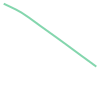

In [24]:
sz_graph.get_edge_data(598153574, 2767949724)[0]["geometry"]

In [8]:
# sz_digraph=ox.utils_graph.get_digraph(sz_graph)

# len(sz_graph.edges)
# len(sz_digraph.edges)

160062

157870

In [17]:
sz_line_graph=nx.line_graph(sz_graph)

len(sz_line_graph.nodes)

160062

In [18]:
# nx.write_gpickle(sz_graph, path="../data/sz_graph.pkl")
# nx.write_gpickle(sz_line_graph, path="../data/sz_line_graph.pkl")

In [19]:
sz_line_graph=nx.read_gpickle("../data/sz_line_graph.pkl")

In [22]:
len(sz_line_graph.nodes)
list(sz_line_graph.nodes)[:10]
list(sz_line_graph.edges)[:10]
sz_line_graph.get_edge_data((598153574, 2767949724, 0), (2767949724, 2768006872, 0))

160062

[(598153574, 2767949724, 0),
 (2767949724, 2768006872, 0),
 (2767949724, 2768006811, 0),
 (598153574, 297121337, 0),
 (297121337, 2320506360, 0),
 (297121337, 1824553511, 0),
 (598153603, 598153605, 0),
 (598153605, 598153609, 0),
 (685056771, 6383446652, 0),
 (6383446652, 685056771, 0)]

[((598153574, 2767949724, 0), (2767949724, 2768006872, 0), 0),
 ((598153574, 2767949724, 0), (2767949724, 2768006811, 0), 0),
 ((2767949724, 2768006872, 0), (2768006872, 2768006773, 0), 0),
 ((2767949724, 2768006872, 0), (2768006872, 2768006811, 0), 0),
 ((2767949724, 2768006872, 0), (2768006872, 2767949724, 0), 0),
 ((2767949724, 2768006811, 0), (2768006811, 2320512612, 0), 0),
 ((2767949724, 2768006811, 0), (2768006811, 2768006872, 0), 0),
 ((598153574, 297121337, 0), (297121337, 2320506360, 0), 0),
 ((598153574, 297121337, 0), (297121337, 1824553511, 0), 0),
 ((297121337, 2320506360, 0), (2320506360, 3906306779, 0), 0)]

{0: {}}

In [3]:
sz_drive=ox.graph_from_place("shenzhen, china", which_result=2, network_type="drive")
ox.save_graphml(sz_drive, "../data/sz_osm_drive.graphml")

In [4]:
sz_graph_drive=ox.load_graphml("../data/sz_osm_drive.graphml")

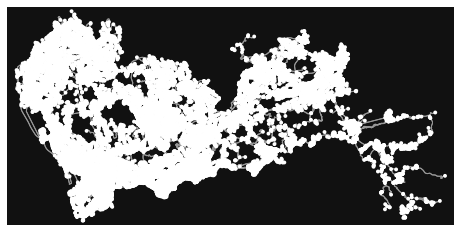

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [5]:
ox.plot_graph(sz_graph_drive)

In [6]:
ox.basic_stats(sz_graph_drive)

{'n': 39256,
 'm': 84306,
 'k_avg': 4.295190544120644,
 'edge_length_total': 15867826.406000324,
 'edge_length_avg': 188.2170474936579,
 'streets_per_node_avg': 3.020990421846342,
 'streets_per_node_counts': {0: 0,
  1: 4460,
  2: 180,
  3: 25009,
  4: 9313,
  5: 271,
  6: 23},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.1136132056246179,
  2: 0.004585286325657224,
  3: 0.6370745873242307,
  4: 0.23723761972692073,
  5: 0.006903403301406154,
  6: 0.000585897697167312},
 'intersection_count': 34796,
 'street_length_total': 11376810.046000123,
 'street_segment_count': 59272,
 'street_length_avg': 191.94240190984146,
 'circuity_avg': 1.0743439570966051,
 'self_loop_proportion': 0.001079767849912269}

In [7]:
sz_line_graph_drive=nx.line_graph(sz_graph_drive)

len(sz_line_graph_drive.nodes)

84306

In [8]:
# nx.write_gpickle(sz_graph_drive, path="../data/sz_graph_drive.pkl")
# nx.write_gpickle(sz_line_graph_drive, path="../data/sz_line_graph_drive.pkl")

---

In [33]:
sz_graph_drive=nx.read_gpickle("../data/sz_graph_drive.pkl")
sz_line_graph_drive=nx.read_gpickle("../data/sz_line_graph_drive.pkl")

list(sz_line_graph_drive.nodes)[:10]

[(598153574, 2767949724, 0),
 (2767949724, 2768006811, 0),
 (2767949724, 2768006811, 1),
 (598153574, 297121337, 0),
 (297121337, 2320506360, 0),
 (297121337, 1824553511, 0),
 (598153603, 598153605, 0),
 (598153605, 598153609, 0),
 (685056781, 6383446647, 0),
 (6383446647, 6383446646, 0)]

In [38]:
sz_graph_drive.get_edge_data(598153574, 2767949724)[0]

{'osmid': 975887590,
 'oneway': True,
 'ref': 'S360',
 'name': '罗沙公路',
 'highway': 'primary',
 'length': 511.571,
 'geometry': <shapely.geometry.linestring.LineString at 0x7f6e4e500b80>}

In [10]:
df_roads=gpd.GeoDataFrame()

df_roads["id"]=sz_line_graph_drive.nodes
df_roads=df_roads.reset_index(drop=True)

df_roads["geometry"]=None
df_roads["center"]=None

df_roads

,id,geometry,center
0,"(598153574, 2767949724, 0)",None,None
1,"(2767949724, 2768006811, 0)",None,None
2,"(2767949724, 2768006811, 1)",None,None
3,"(598153574, 297121337, 0)",None,None
4,"(297121337, 2320506360, 0)",None,None
...,...,...,...
84301,"(9148694973, 9148694974, 0)",None,None
84302,"(9148694975, 9148694973, 0)",None,None
84303,"(9148694975, 9148694973, 1)",None,None
84304,"(9148694975, 9148694976, 0)",None,None


只取主干道

划一个区

In [35]:
highway_types=["motorway", "trunk", "primary", "secondary", "motorway_link", "trunk_link", "primary_link", "secondary_link"]
def get_geom_center(row):
    road=row["id"]

    road_data_dict=sz_graph_drive.get_edge_data(road[0], road[1])[road[2]]

    if isinstance(road_data_dict["highway"], list):
        for road_type in road_data_dict["highway"]:
            if road_type not in highway_types:
                return row
    elif isinstance(road_data_dict["highway"], str):
        if road_data_dict["highway"] not in highway_types:
            return row

    if "geometry" not in road_data_dict:
        return row

    geom=road_data_dict["geometry"].buffer(distance=0.0001)
    minx, miny, maxx, maxy=geom.bounds
    center=((minx+maxx)/2, (miny+maxy)/2)

    row["geometry"]=geom
    row["center"]=center

    return row

df_roads=df_roads.apply(get_geom_center, axis=1)

df_roads

,id,geometry,center
0,"(598153574, 2767949724, 0)","POLYGON ((114.17454 22.56222, 114.17454 22.562...","(114.17621206809773, 22.560903081902268)"
1,"(2767949724, 2768006811, 0)",None,None
2,"(2767949724, 2768006811, 1)","POLYGON ((114.17919 22.55897, 114.17919 22.558...","(114.1800173748672, 22.55824867513279)"
3,"(598153574, 297121337, 0)","POLYGON ((114.17464 22.56211, 114.17464 22.562...","(114.20008177180853, 22.56214954703517)"
4,"(297121337, 2320506360, 0)","POLYGON ((114.22842 22.56748, 114.22842 22.567...","(114.2279936303635, 22.568082525145726)"
...,...,...,...
84301,"(9148694973, 9148694974, 0)",None,None
84302,"(9148694975, 9148694973, 0)",None,None
84303,"(9148694975, 9148694973, 1)",None,None
84304,"(9148694975, 9148694976, 0)",None,None


In [36]:
df_roads.isnull().sum()

id              0
geometry    68153
center      68153
dtype: int64

In [ ]:
sz_graph_drive.get_edge_data(9148694975, 9148694973)[0]
sz_graph_drive.get_edge_data(9148694975, 9148694973)[1]
sz_graph_drive.get_edge_data(297121337, 2320506360)[0]

In [37]:
df_roads=df_roads.dropna()
df_roads=df_roads.reset_index(drop=True)

df_roads

,id,geometry,center
0,"(598153574, 2767949724, 0)","POLYGON ((114.17454 22.56222, 114.17454 22.562...","(114.17621206809773, 22.560903081902268)"
1,"(2767949724, 2768006811, 1)","POLYGON ((114.17919 22.55897, 114.17919 22.558...","(114.1800173748672, 22.55824867513279)"
2,"(598153574, 297121337, 0)","POLYGON ((114.17464 22.56211, 114.17464 22.562...","(114.20008177180853, 22.56214954703517)"
3,"(297121337, 2320506360, 0)","POLYGON ((114.22842 22.56748, 114.22842 22.567...","(114.2279936303635, 22.568082525145726)"
4,"(297121337, 1824553511, 0)","POLYGON ((114.22840 22.56757, 114.22966 22.567...","(114.2413088443007, 22.5733112943007)"
...,...,...,...
16148,"(9148457351, 2754531888, 0)","POLYGON ((114.01602 22.64837, 114.01602 22.648...","(114.0161446934389, 22.6480433065611)"
16149,"(9148457261, 7202299527, 0)","POLYGON ((114.00864 22.64826, 114.00861 22.648...","(114.00952040000087, 22.648972200000863)"
16150,"(9148457386, 6327148773, 0)","POLYGON ((114.01136 22.66332, 114.01132 22.663...","(114.01180144535755, 22.66300115464245)"
16151,"(9148457385, 9148457383, 0)","POLYGON ((114.01237 22.66246, 114.01326 22.661...","(114.01335557989087, 22.66127547010913)"


In [ ]:
# df_roads.to_pickle("../data/df_main_roads.pkl")

In [20]:
df_roads=gpd.GeoDataFrame(pd.read_pickle("../data/df_main_roads.pkl"))

df_roads

,id,geometry,center
0,"(598153574, 2767949724, 0)","POLYGON ((114.17454 22.56222, 114.17454 22.562...","(114.17621206809773, 22.560903081902268)"
1,"(2767949724, 2768006811, 1)","POLYGON ((114.17919 22.55897, 114.17919 22.558...","(114.1800173748672, 22.55824867513279)"
2,"(598153574, 297121337, 0)","POLYGON ((114.17464 22.56211, 114.17464 22.562...","(114.20008177180853, 22.56214954703517)"
3,"(297121337, 2320506360, 0)","POLYGON ((114.22842 22.56748, 114.22842 22.567...","(114.2279936303635, 22.568082525145726)"
4,"(297121337, 1824553511, 0)","POLYGON ((114.22840 22.56757, 114.22966 22.567...","(114.2413088443007, 22.5733112943007)"
...,...,...,...
16148,"(9148457351, 2754531888, 0)","POLYGON ((114.01602 22.64837, 114.01602 22.648...","(114.0161446934389, 22.6480433065611)"
16149,"(9148457261, 7202299527, 0)","POLYGON ((114.00864 22.64826, 114.00861 22.648...","(114.00952040000087, 22.648972200000863)"
16150,"(9148457386, 6327148773, 0)","POLYGON ((114.01136 22.66332, 114.01132 22.663...","(114.01180144535755, 22.66300115464245)"
16151,"(9148457385, 9148457383, 0)","POLYGON ((114.01237 22.66246, 114.01326 22.661...","(114.01335557989087, 22.66127547010913)"


报告作图

---

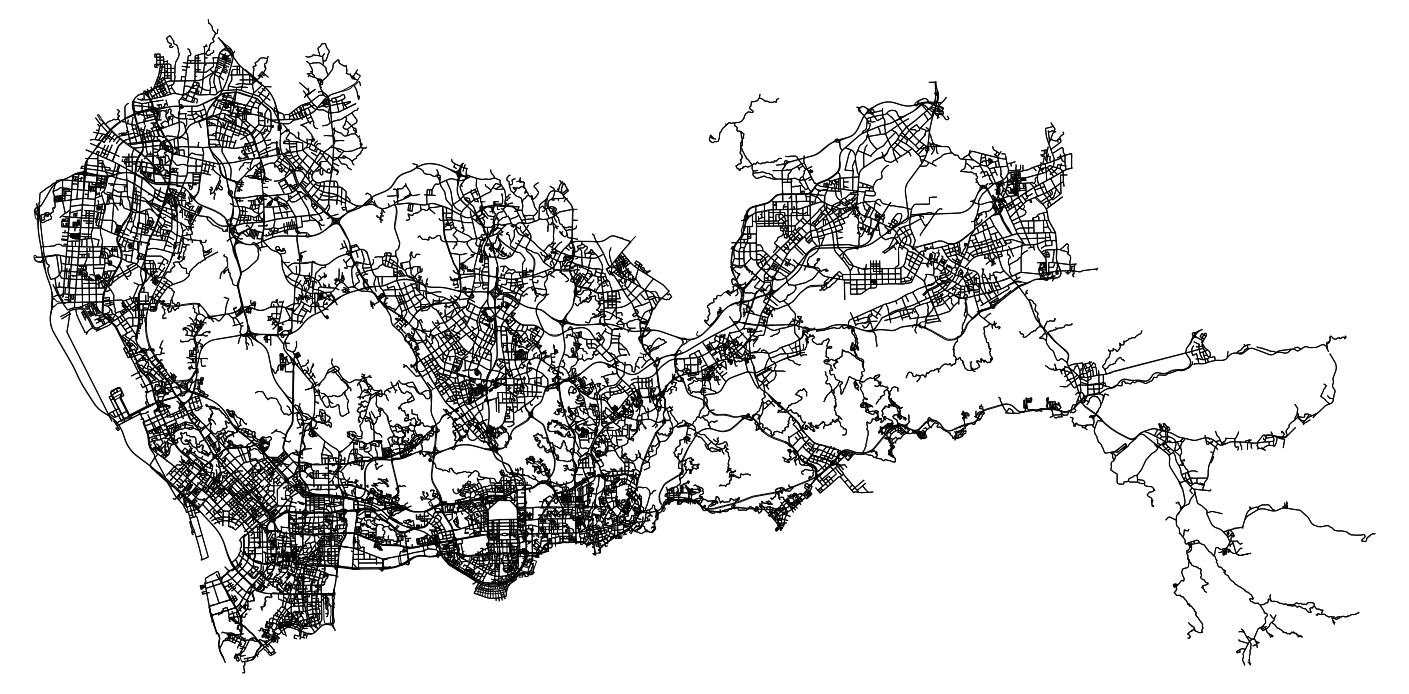

(<Figure size 1800x1080 with 1 Axes>, <AxesSubplot:>)

In [18]:
ox.plot_graph(sz_graph_drive, figsize=(25, 15), bgcolor="white", node_color="blue", edge_color="black", node_size=0)

In [29]:
def show_geom(obj, color, title, cmap=None):
    """
    - 画几何图形
    - obj 为 GeoDataFrame/GeoSeries
    - 使用例:
        - df_midpoint=gp.GeoDataFrame(geometry=midpointcoords)
        - show_points(df_midpoint, "red", "中点")
    """

    fig, ax=plt.subplots(figsize=(25, 15))
    obj.plot(ax=ax, color=color, cmap=cmap, markersize=0.2)
    plt.title(title, fontsize=15, fontname="Source Han Serif CN", color="black")
    ax.axis("off")
    fig.canvas.set_window_title(title)

    plt.show()

/tmp/ipykernel_37477/4009852447.py:14: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title(title)


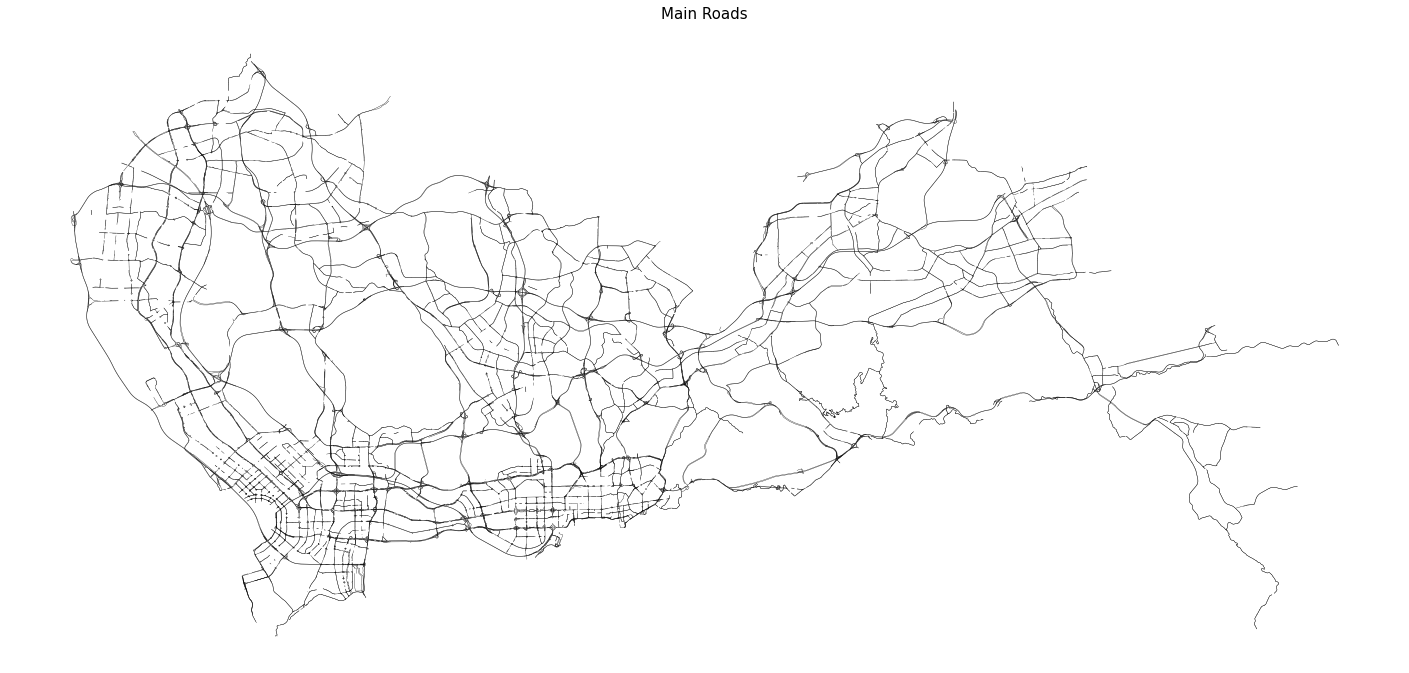

In [32]:
show_geom(df_roads, "black", "Main Roads");

In [42]:
np.random.randint(0, 300, (10, 10))

array([[242,  37,  93, 267, 240, 139, 285, 274, 245,  33],
       [150, 236, 155,  80, 265, 216, 165,  54,  34,  20],
       [207,  88, 181,  82, 208, 249, 290,  48, 273, 119],
       [ 22, 293, 231,  34,  64,  56,  29,  49,  14, 246],
       [ 39, 182, 261, 131, 211,   1, 259, 252, 115, 126],
       [299, 163, 271, 247, 131,  94, 128, 245,  19, 154],
       [104,  77,  14,  50, 284, 129, 121,  51, 106, 157],
       [247,   3, 176, 151, 121,  44, 269,  87, 298, 112],
       [293, 293, 125, 210, 275,  79,   0, 286, 150, 127],
       [158, 235, 250,   1, 205, 225, 254, 268, 195,  32]])